In [3]:
#pip install geopandas

In [4]:
#-------------------------------#
# Step 1: Load and inspect data
#-------------------------------#

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Set working directory and read the data
df = pd.read_csv('D:/Teaching/SCMA632 2025 C51/Assignments/Data/NSSO68.csv')

# Inspect column names
print(df.columns)

# Check the 'foodtotal_v' column
print(df['foodtotal_v'].head())

C:\Users\Patil\AppData\Local\Temp\ipykernel_11116\2043613248.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/Teaching/SCMA632 2025 C51/Assignments/Data/NSSO68.csv')


Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
0    1141.492400
1    1244.553500
2    1050.315400
3    1142.591667
4     945.249500
Name: foodtotal_v, dtype: float64


4094
(4094, 384)


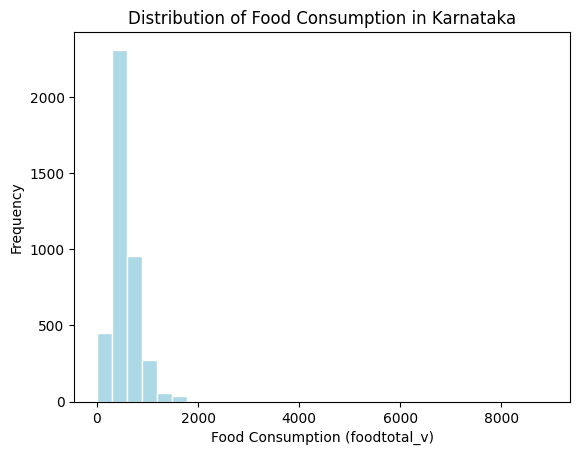

In [5]:
#----------------------------------------#
# Step 2: Filter the data for Karnataka
#----------------------------------------#

# Check how many Karnataka rows are there
print((df['state_1'] == 'KA').sum())

# Filter rows where state_1 is 'KA'
ka = df[df['state_1'] == 'KA'].copy()
print(ka.shape)

# Histogram of food consumption in Karnataka
plt.hist(ka['foodtotal_v'].dropna(), bins=30, color='lightblue', edgecolor='white')
plt.title("Distribution of Food Consumption in Karnataka")
plt.xlabel("Food Consumption (foodtotal_v)")
plt.ylabel("Frequency")
plt.show()

In [6]:
#----------------------------------------------#
# Step 3: Group-wise summary at District level
#----------------------------------------------#

# Compute district-wise average food consumption
ka['District'] = ka['District'].astype(str).str.zfill(2)  # Pad district numbers to 2 digits
ka['DWCons'] = ka.groupby('District')['foodtotal_v'].transform('mean')

In [8]:
#--------------------------------------------------------#
# Step 4: Create mapping of District Codes to Names
#--------------------------------------------------------#

district_map = pd.DataFrame({
    'DistrictCode': [f"{i:02d}" for i in range(1, 30)],
    'DistrictName': [
        "Belgaum", "Bagalkot", "Bijapur", "Gulbarga", "Bidar", "Raichur", "Koppal",
        "Gadag", "Dharwad", "Uttara Kannada", "Haveri", "Bellary", "Chitradurga",
        "Davanagere", "Shimoga", "Udupi", "Chikmagalur", "Tumkur", "Kolar", 
        "Bangalore", "Bangalore Rural", "Mandya", "Hassan", "Dakshina Kannada",
        "Kodagu", "Mysore", "Chamarajanagar", "Ramanagar", "Chikkaballapura"
    ]
})

In [9]:
#---------------------------------------------------------#
# Step 5: Merge mapping into main data using District code
#---------------------------------------------------------#

# Create a DistrictCode column from District number
ka['DistrictCode'] = ka['District']

# Merge to get District names
ka = ka.merge(district_map, on='DistrictCode', how='left')


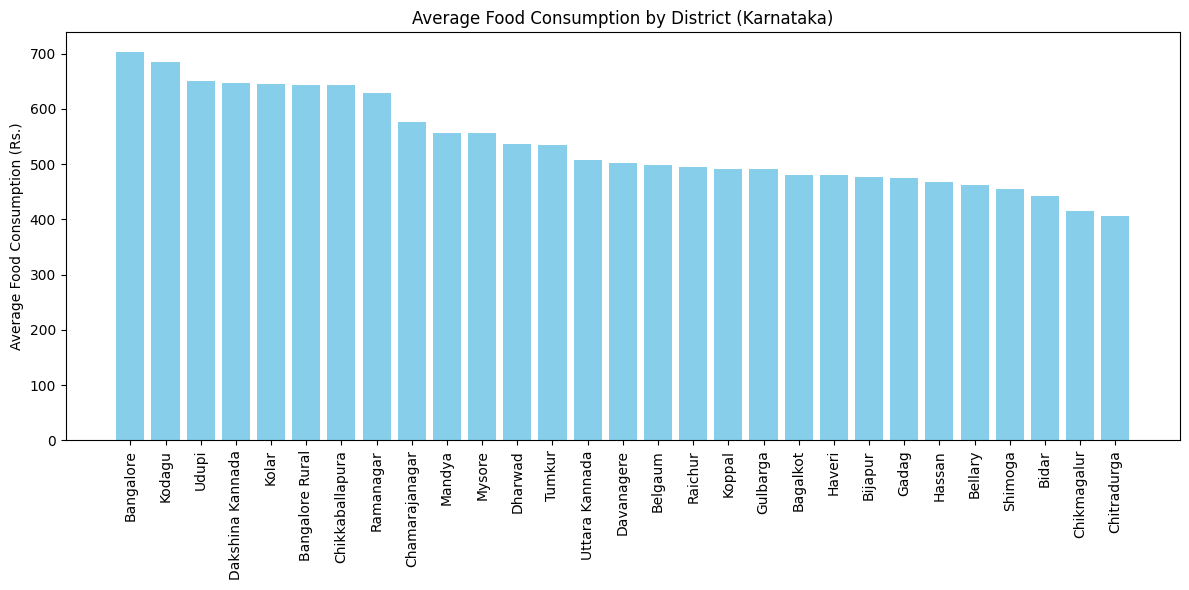

In [10]:
#------------------------------------------------#
# Step 6: Summarize and Plot Bar Chart
#------------------------------------------------#

# Create summary table: average food consumption by district
district_avg = ka.groupby('DistrictName')['foodtotal_v'].mean().reset_index()
district_avg = district_avg.sort_values(by='foodtotal_v', ascending=False)

# Barplot: average food consumption by district
plt.figure(figsize=(12, 6))
plt.bar(district_avg['DistrictName'], district_avg['foodtotal_v'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Average Food Consumption by District (Karnataka)")
plt.ylabel("Average Food Consumption (Rs.)")
plt.tight_layout()
plt.show()

<Axes: >

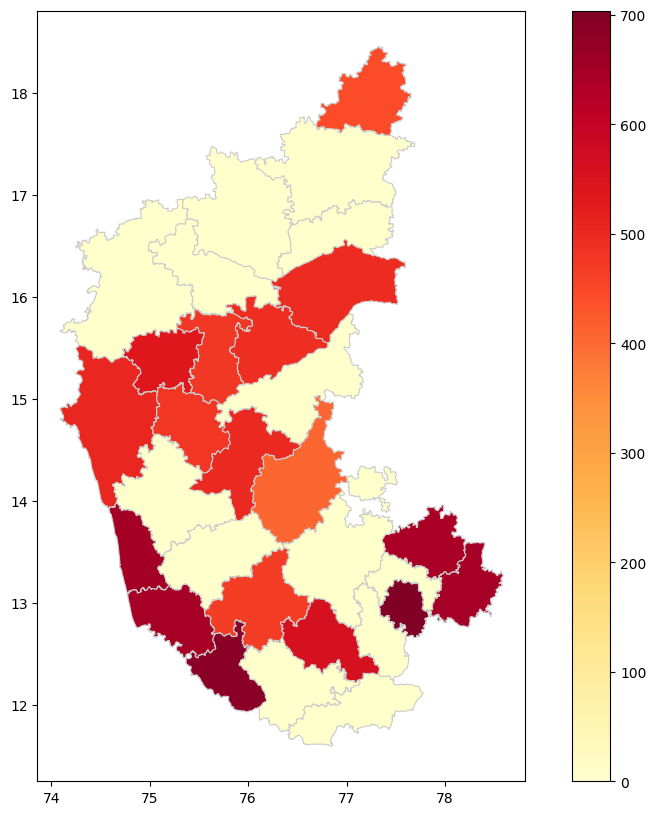

In [11]:
#------------------------------------------------#
# Step 7: Choropleth Map using GeoPandas
#------------------------------------------------#

# Read GeoJSON file
data_map = gpd.read_file("D:/Teaching/SCMA632 2025 C51/Assignments/Data/KARNATAKA_DISTRICTS.geojson")

# Check and rename the district column
data_map = data_map.rename(columns={'dtname': 'DistrictName'})

# Merge geo data with average food data
data_map_data = data_map.merge(district_avg, on='DistrictName', how='left')

# Fill missing values with 0
data_map_data['foodtotal_v'] = data_map_data['foodtotal_v'].fillna(0)

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
data_map_data.plot(column='foodtotal_v',
                   cmap='YlOrRd',
                   linewidth=0.8,
                   ax=ax,
                   edgecolor='0.8',
                   legend=True)

In [12]:

# Add labels
for idx, row in data_map_data.iterrows():
    if row['geometry'].centroid.is_empty:
        continue
    plt.annotate(s=row['DistrictName'],
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center',
                 fontsize=8,
                 color='black')

plt.title("Average Food Consumption by District (Karnataka)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

TypeError: annotate() missing 1 required positional argument: 'text'